In [ ]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # Thêm thư viện numpy dùng tính toán 
import pandas as pd # xử lý dữ liệu, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt #Thư viện dùng vẽ đồ thị,... 
%matplotlib inline  
import seaborn as sns # Thư viện để tạo biểu đồ,...

from sklearn.model_selection import train_test_split #Chia mảng or ma trận các tập con
from sklearn.preprocessing import LabelEncoder # Mã hóa các nhãn đích có giá trị 0 đến n_classes-1
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve   #Xây dựng, đánh giá dcx, tính toán dcx, tính diện tích, khu vực tính diện tích.
from sklearn.tree import DecisionTreeClassifier, export_graphviz #bộ phân loại cây quyết định, xuất cây quyết định ở dạng DOT
import graphviz  
from sklearn.model_selection import cross_val_predict, cross_val_score #ước tính được xác thực chéo cho mỗi điểm dữ liệu đầu vào, Đánh giá điểm bằng cách xác nhận chéo.
from sklearn.tree import DecisionTreeClassifier as clf  # gán giá trị vào clf
from sklearn import tree 


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Tathv/Học Máy/bank/Maternal Health Risk Data Set.csv') #lấy dữ liệu từ file csv
#Hiển thị thuộc tính các cột trong data
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Data Cleaning


In [ ]:
dataset.shape #xem dữ liệu và thuộc tính 

(1014, 7)

In [ ]:
dataset.columns #xem các thuộc tính của dataset

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
dataset['SystolicBP'].unique() #liệt kê các dữ liệu xuất hiện trong cột SystolicBP

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [ ]:
dataset['Age'].value_counts() #Đếm tần suất xuất hiện của các dữ liệu của cột Age

23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: Age, dtype: int64

In [ ]:
from sklearn import preprocessing  #Tiền xử lý dữ liệu
labelEncoder = preprocessing.LabelEncoder()  # mã hóa nhãn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


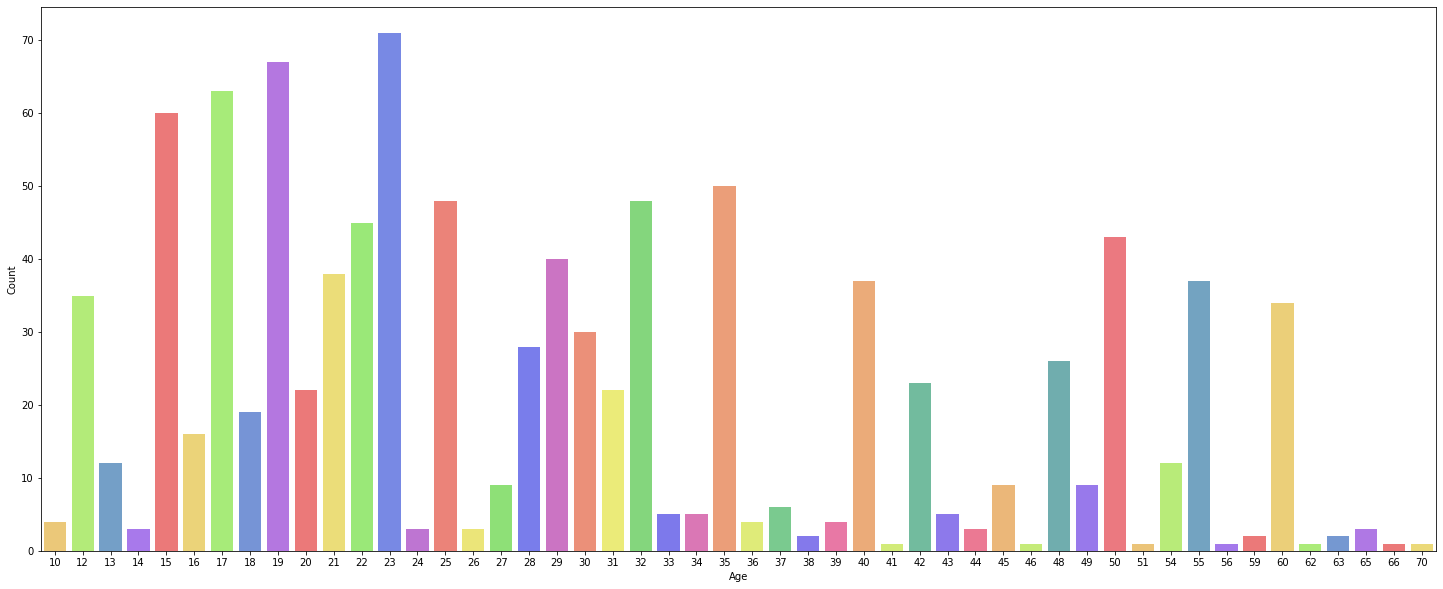

In [ ]:
count = dataset['Age'].value_counts() # tạo biến count để đếm tần số xuất hiện của dữ liệu cột Age
sns.set_context(font_scale=1.5) #chỉnh thông số của biểu đồ
plt.figure(figsize=(25,10)) # Kích thước của biểu đồ
sns.barplot(count.index, count.values, alpha=0.6, palette="prism") #truyền giá trị để vẽ biểu đồ
plt.ylabel('Count', fontsize=10) 
plt.xlabel('Age', fontsize=10)
plt.savefig("Age.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


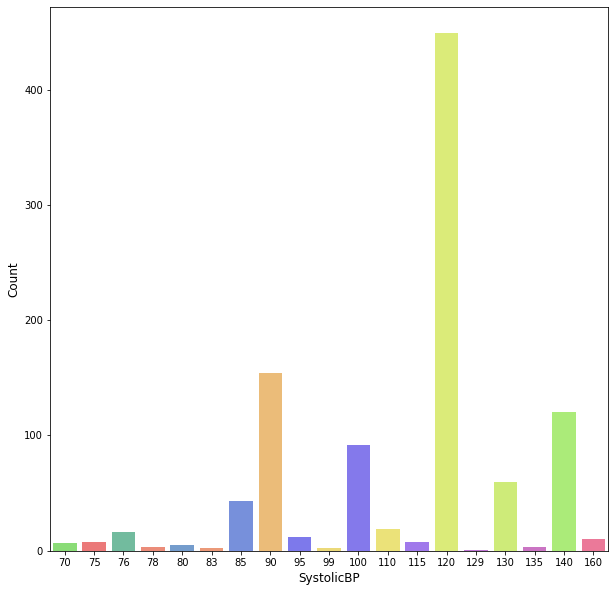

In [ ]:
count = dataset['SystolicBP'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('SystolicBP', fontsize=12)
plt.savefig("SystolicBP.jpeg", format='jpeg', dpi=100)
plt.show() # huyết áp cao

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


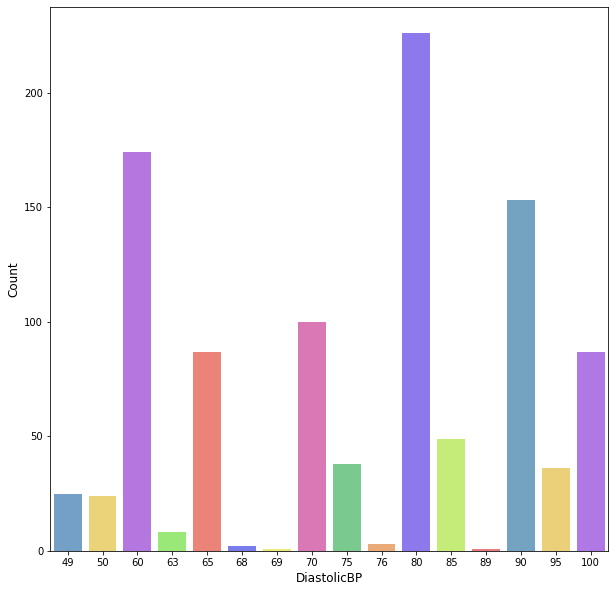

In [ ]:
count = dataset['DiastolicBP'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('DiastolicBP', fontsize=12)
plt.savefig("DiastolicBP.jpeg", format='jpeg', dpi=100)
plt.show() #huyết áp thấp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


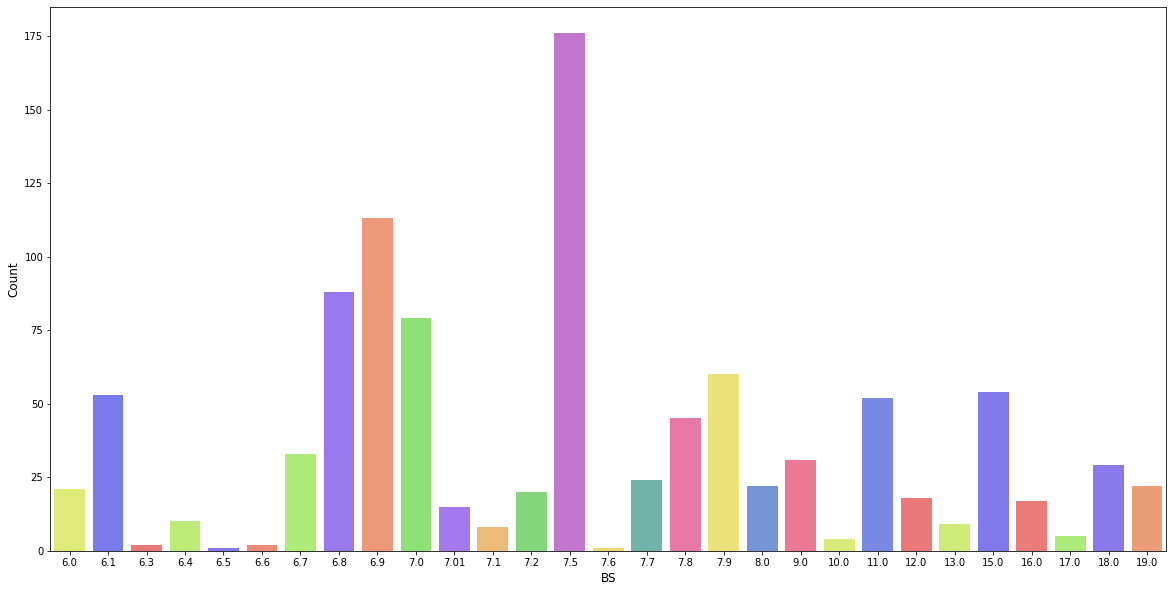

In [ ]:
count = dataset['BS'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BS', fontsize=12)
plt.savefig("BS.jpeg", format='jpeg', dpi=100)
plt.show() # nồng độ đường huyết

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


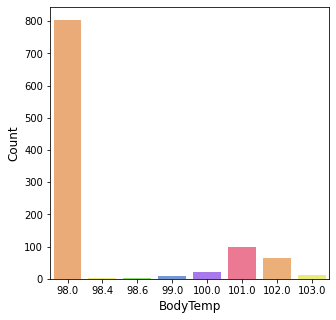

In [ ]:
count = dataset['BodyTemp'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BodyTemp', fontsize=12)
plt.savefig("BodyTemp.jpeg", format='jpeg', dpi=100)
plt.show() # nhiệt độ cơ thể

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


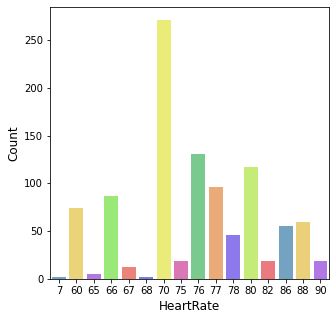

In [ ]:
count = dataset['HeartRate'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('HeartRate', fontsize=12)
plt.savefig("HeartRate.jpeg", format='jpeg', dpi=100)
plt.show() #nhịp tim

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


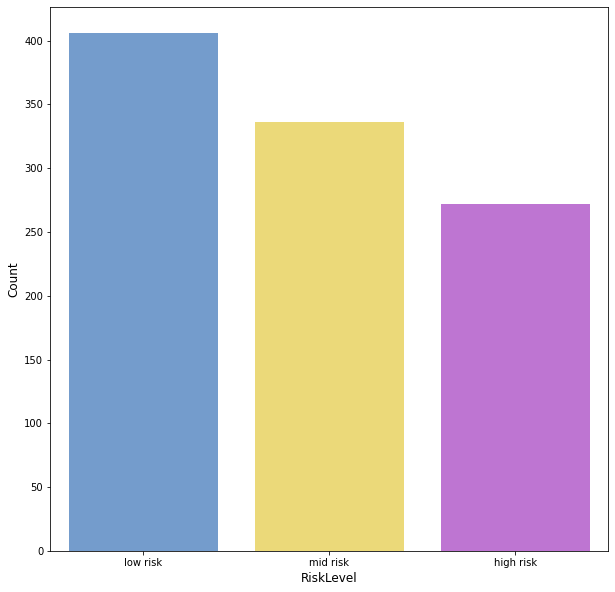

In [ ]:
count = dataset['RiskLevel'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('RiskLevel', fontsize=12)
plt.savefig("RiskLevel.jpeg", format='jpeg', dpi=100)
plt.show() #mức độ rủi ro

In [ ]:
 dataset['RiskLevel'].value_counts()


low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [431]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column]) # phương pháp thực hiện điều chỉnh và biến đổi trên dữ liệu đầu vào
    #print(column)
    #print(dataset[column])

In [ ]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()  #Mã hóa các nhãn đích có giá trị từ 0 đến n_classes-1.

In [ ]:
X = dataset.iloc[:,1:].values  #.iloc: Lập chỉ mục hoàn toàn dựa trên vị trí số nguyên để lựa chọn theo vị trí.
y = dataset.iloc[:,0].values
print(X)
print(y)
#khởi tạo điểm x=1; y=0

[[15 10 24  0 13  0]
 [17 13 23  0  6  0]
 [ 7  7 18  4 11  0]
 ...
 [ 6  2 28  0 13  0]
 [13 13 27  0  6  0]
 [13  4  0  5  8  2]]
[14 24 18 ... 24 32 21]


In [ ]:
dataset.head() # trả về 5 dòng dữ liệu sau khi đã mã hóa

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,14,15,10,24,0,13,0
1,24,17,13,23,0,6,0
2,18,7,7,18,4,11,0
3,19,17,11,9,0,6,0
4,24,13,2,1,0,8,1


In [ ]:
dataset.info() # xuất tóm tắt về khung dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1014 non-null   int64
 1   SystolicBP   1014 non-null   int64
 2   DiastolicBP  1014 non-null   int64
 3   BS           1014 non-null   int64
 4   BodyTemp     1014 non-null   int64
 5   HeartRate    1014 non-null   int64
 6   RiskLevel    1014 non-null   int64
dtypes: int64(7)
memory usage: 55.6 KB


In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=4) # phân loại cây quyết định(chiều sâu tối đa, số lượng mẫu tối thiểu)
decision_tree.fit(X,y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

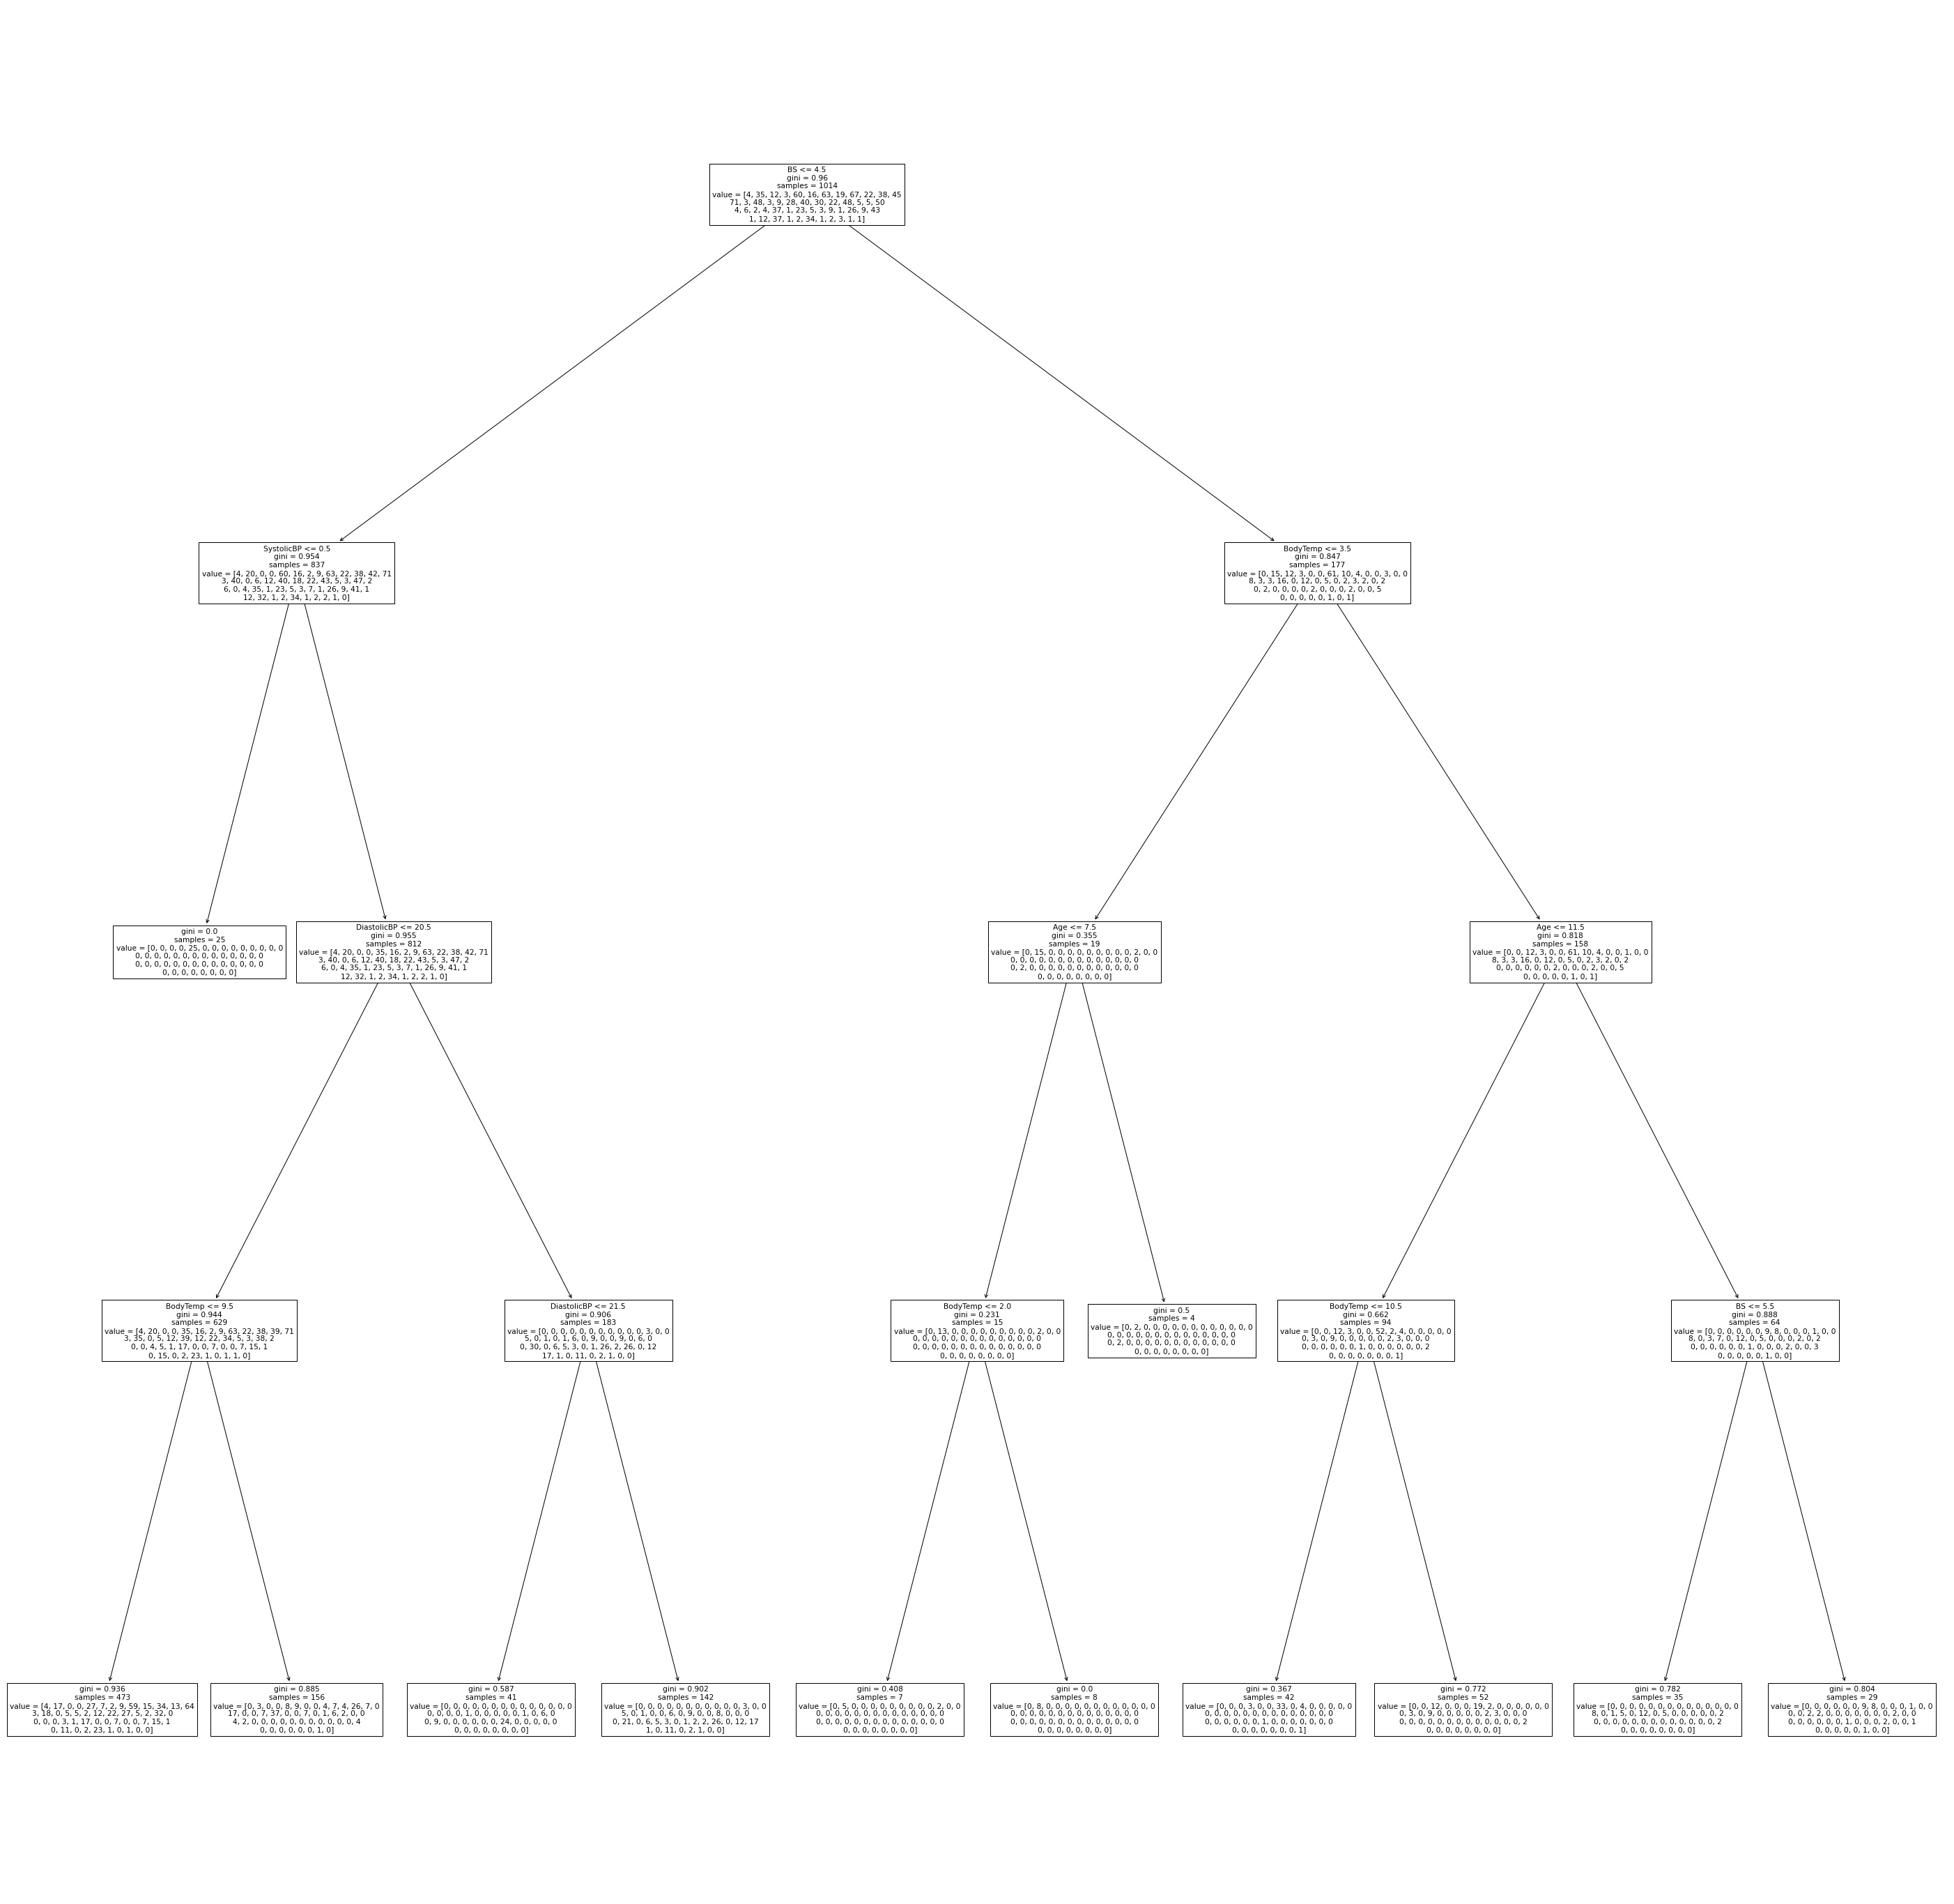

In [ ]:
fig, axis = plt.subplots(figsize=(50,50)) #Tạo một hình và một tập hợp các ô phụ.
tree.plot_tree(decision_tree, ax=axis, feature_names=['Age','SystolicBP','DiastolicBP',	'BS',	'BodyTemp',	'HeartRate',	'RiskLevel'])  #vẽ cây quyết định
plt.show()

In [ ]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = dataset.drop(['RiskLevel'], axis=1) #Xoá 1 cột "RiskLevel" và trả lại một đối tượng mới
Y = dataset["RiskLevel"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=20, test_size=0.3) #[phân tách dữ liệu train và test (train 70% & test 30%)
print(X_train_dt.shape) # dữ liệu 70% của X_dt
print(X_test_dt.shape) # dữ liệu 30% của X_dt

(709, 6)
(305, 6)


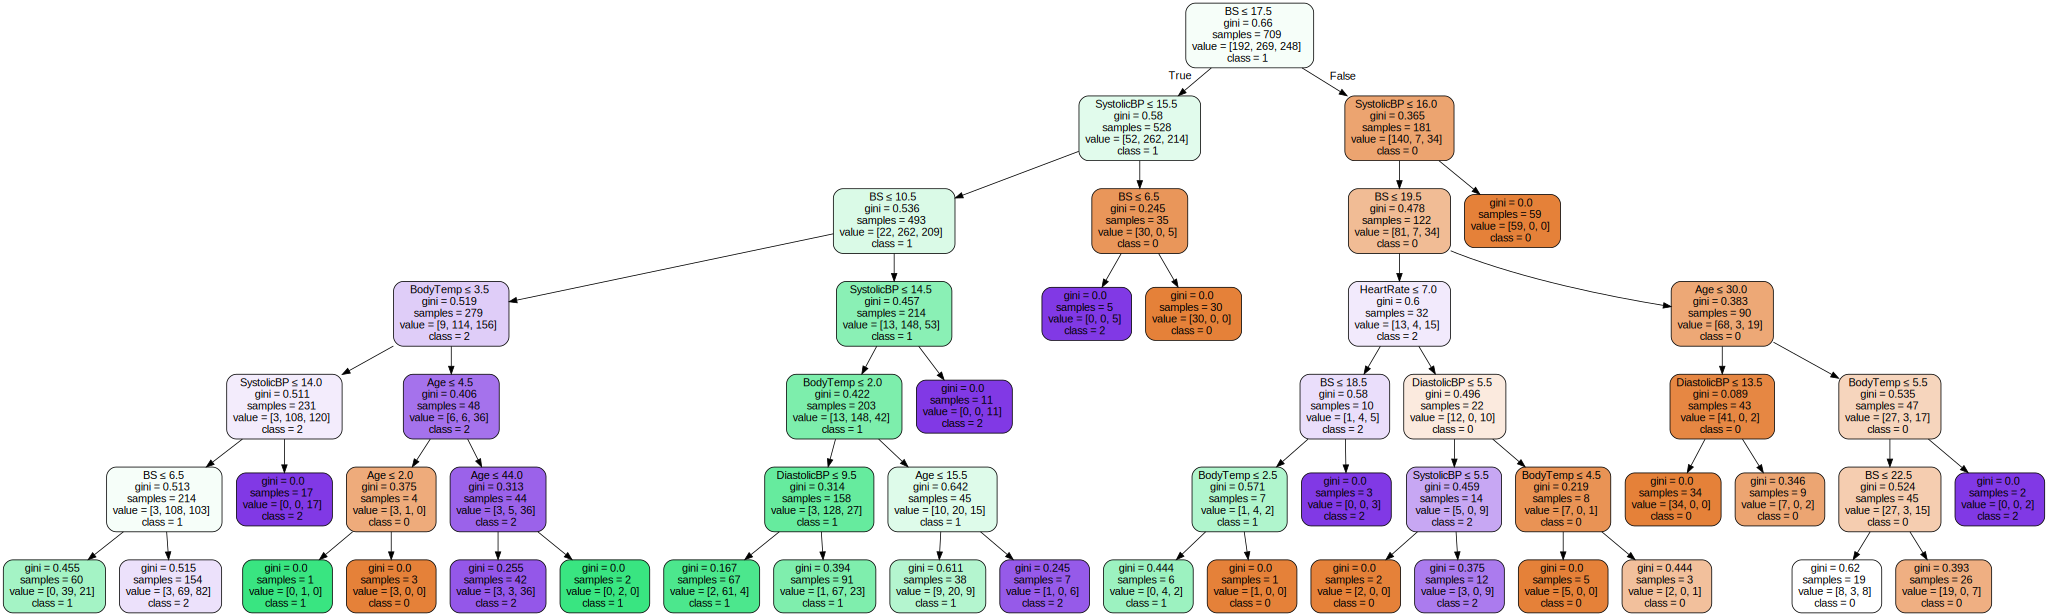

In [ ]:
Y_name = ['0','1','2']
clf = DecisionTreeClassifier(max_depth = 6,random_state=1) # dùng để phân tích cây có độ sâu lớn nhất là 6 và mẫu tối thiểu là 1 
clf.fit(X_train_dt, Y_train_dt) #  thực hiện tính toán trên các giá trị đặc trưng của dữ liệu đầu vào
Y_pred_dt = clf.predict(X_test_dt) #dùng để dự đoán dữ liệu test hiện có và nhận được phản hồi dự đoán cho cây
dot_data = export_graphviz(clf, out_file=None,   # xuất cây quyết định dưới định dạng DOT
                         feature_names=X_dt.columns,
                         class_names=Y_name,
                         filled=True, rounded=True,
                         special_characters=True) 
graph = graphviz.Source(dot_data) #loại bỏ các ký tự không cần thiết và xuất lại
graph.render(filename='DecisionTree')
graph


In [ ]:
scores = cross_val_score(decision_tree, X, y, cv=5) #Đánh giá điểm bằng cách xác nhận chéo,cv là Xác định phân tách xác thực chéo
tb_scores = np.mean(scores) # dùng để tính trung bình cộng dọc theo trục được chỉ định.
print(scores)
tb_scores

[0.25123153 0.2364532  0.24630542 0.26108374 0.25247525]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.24950982783007367

In [ ]:
from sklearn.preprocessing import StandardScaler #Chuẩn hóa các đối tượng bằng cách loại bỏ giá trị trung bình và chia tỷ lệ thành phương sai đơn vị

In [ ]:
scaler = StandardScaler() # làm cho dữ liệu nhỏ lại để khớp và dễ kiểm soát

In [ ]:
scaler_X = scaler.fit_transform(dataset) #tính giá trị trung bình và phương sai

In [ ]:
scaler_X

array([[-0.35157219,  0.89699358,  0.37335201, ..., -0.49948092,
         1.43791694, -1.37751234],
       [ 0.44435146,  1.42626415,  1.02607433, ..., -0.49948092,
        -0.48526648, -1.37751234],
       [-0.03320273, -1.22008873, -0.2793703 , ...,  1.3574344 ,
         0.88843596, -1.37751234],
       ...,
       [ 0.44435146, -1.48472402, -1.36724082, ..., -0.49948092,
         1.43791694, -1.37751234],
       [ 1.08109038,  0.367723  ,  1.02607433, ..., -0.49948092,
        -0.48526648, -1.37751234],
       [ 0.20557436,  0.367723  , -0.93209261, ...,  1.82166323,
         0.06421449,  1.21394872]])

Correlation Between Spending Categories


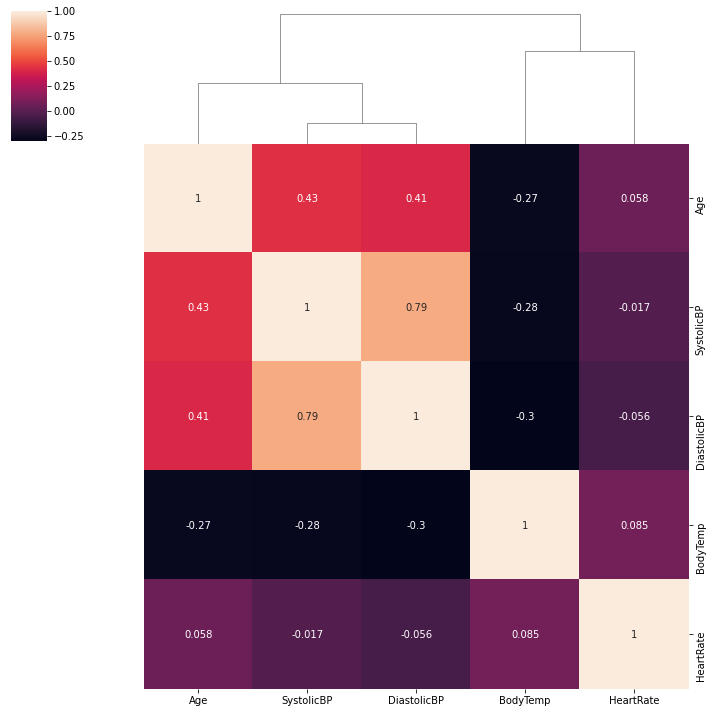

In [ ]:
print('Correlation Between Spending Categories') 
sns.clustermap(data=dataset.drop(['BS','RiskLevel'], axis=1).corr(), annot=True, row_cluster=False); # vẽ tập dữ liệu dưới dạng biểu đồ nhiệt => xét độ tương quan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
number_of_outliers = []
percentage_of_outliers = []

# min_samples điểm khởi đầu: 2 * no.of dimension()
min_samples = 2 * scaler_X.shape[1]

for eps in np.linspace(0.001,3,50): # Vòng lặp eps từ 0.001 tới 3 và tạo ra 50 mẫu trong phạm vi từ 0.001 tới 3
  #khởi tạo model
  dbscan = DBSCAN(eps = eps , min_samples= min_samples)
  dbscan.fit(scaler_X) 

# Number of clusters (số lượng cụm)
  number_of_outliers.append(np.sum(dbscan.labels_==-1))

# Percentage of points classified as outlies (tính phần trăm)
  perc_outliers = 100 * np.sum(dbscan.labels_==-1) / len(dbscan.labels_)
  percentage_of_outliers.append(perc_outliers)

Text(0, 0.5, 'Percentage of Outliers')

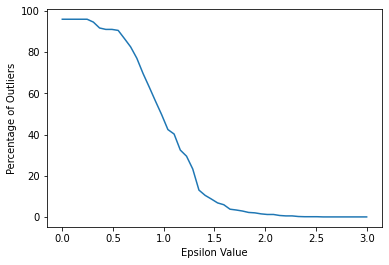

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50), y=percentage_of_outliers) # xem eps(Epsilon) chạy như nào (xem có sai số hay ko )
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Outliers")

In [ ]:
min_samples = 2 * scaler_X.shape[1] # tính giá trị tb mẫu
dbscan = DBSCAN(eps=2,min_samples=min_samples)


In [ ]:
dbscan.fit(scaler_X)  #xuất giá trị tính toán cùa dữ liệu đầu vào dbscan

DBSCAN(eps=2, min_samples=14)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

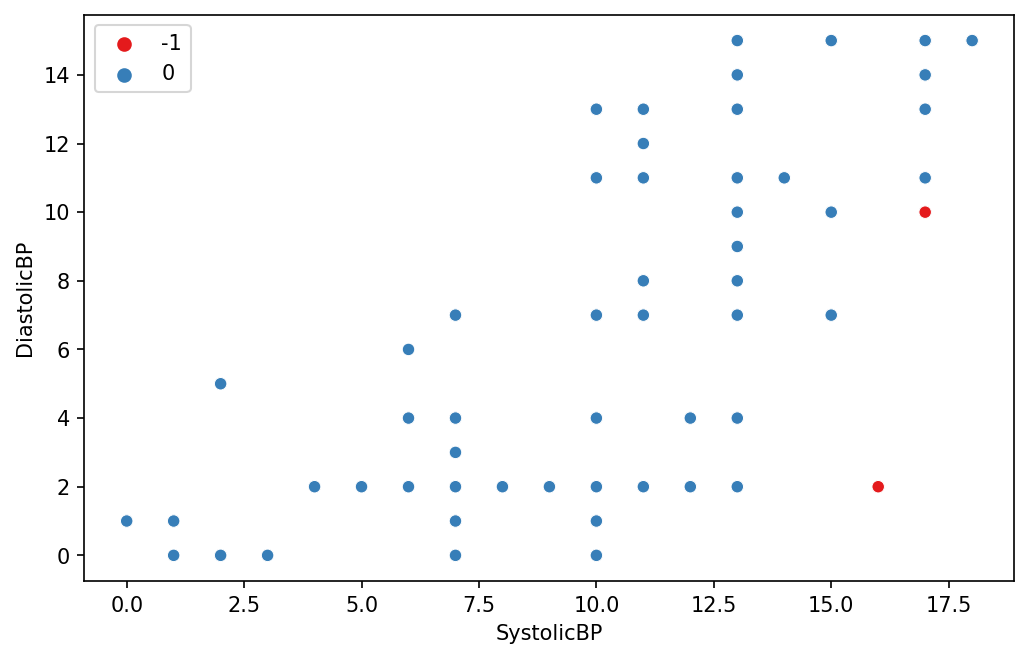

In [430]:
plt.figure(figsize=(8,5), dpi=150) 
sns.scatterplot(data = dataset, x='SystolicBP',y='DiastolicBP', hue=dbscan.labels_, palette='Set1')  # vẽ dbscan

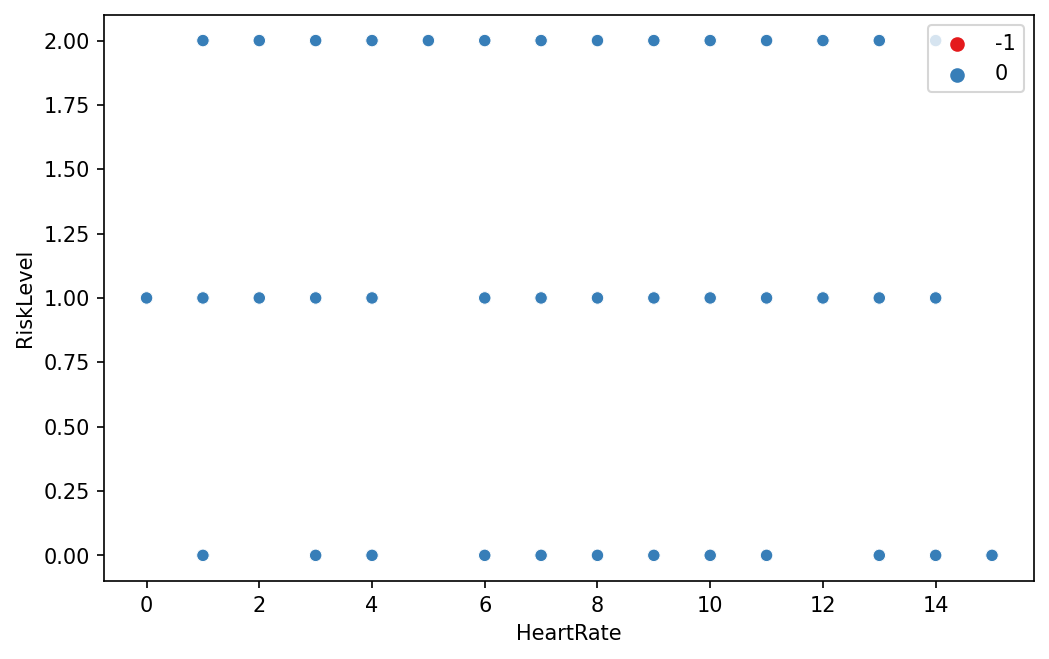

In [ ]:
plt.figure(figsize=(8,5), dpi=150)
sns.scatterplot(data = dataset, x='HeartRate',y='RiskLevel', hue=dbscan.labels_, palette='Set1') # vẽ dbscan